In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
#загрузка csv-файлов (датасеты 'user_data' и 'logs' со stepik.org)
user_df = pd.read_csv('user_data.csv')
logs_df = pd.read_csv('logs.csv')

# Описание данных

1) user_data
- client – идентификатор пользователя
- premium – является ли клиент премиальным
- age – возраст


2) logs
- client – идентификатор пользователя
- success – результат (успех – 1, нет – 0)
- platform – платформа
- time – время в формате Unix

In [3]:
# просмотр первых пяти строк DataFrame пользователей
user_df.head(5)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
# просмотр первых пяти строк DataFrame логов
logs_df.head(5)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


## Задания:

1. Предобработать данные
     - оценить валидность и корректность данных
     - оценить данные на наличие пропущенных значений, дубликатов и выбросов, обработать их
     - посчитать описательные статистики 
2. Какой клиент совершил больше всего успешных операций?
3. С какой платформы было совершено наибольшее количество успешных операций?
4. Какую платформу предпочитают премиальные клиенты?
5. Клиенты каких возрастных групп чаще имеют премиальный статус?
6. В какой день недели клиенты совершают максимальное число операций? 
7. В какой час суток максимальное число операций оказывается неудачным?
8. Прослеживается ли годовая сезонность в числе совершаемых операций?
9. Клиенты какого возраста совершили наибольшее количество успешных операций (для каждого вида платформ)?

# Предобработка данных 

## User_df

In [5]:
user_df.shape
# просмотр размера DataFrame

(2954, 3)

In [6]:
user_df.dtypes
# типы данных установлены корректно

client     int64
premium     bool
age        int64
dtype: object

In [7]:
user_df.isnull().sum()
# пропущенных значений нет

client     0
premium    0
age        0
dtype: int64

In [8]:
user_df.isna().sum()
# пропущенных значений нет

client     0
premium    0
age        0
dtype: int64

In [9]:
user_df.duplicated().sum()
# дубликатов нет

0

In [10]:
user_df.describe()
# описательные статистики
# использование описательной статистики по столбцу client некорректно, поскольку это идентификатор пользователя

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
for column in user_df:
    print(user_df[column].unique())
# просмотр уникальных значений в каждой колонке для визуальной оценки данных

[46346  4391 27372 ... 61221 29863 78499]
[False  True]
[58 55 64 44 49 36 34 48 42 59 24 40 25 21 31 69 53 35 38 52 27 50 20 63
 39 26 37 62 43 46 41 23 28 29 68 51 30 61 22 65 47 66 57 32 60 45 67 56
 54 33]


In [12]:
user_df.columns
# просмотр названий столбцов
# названия столбцов корректны, переименовывать их не нужно

Index(['client', 'premium', 'age'], dtype='object')

## logs_df

In [13]:
logs_df.shape
# просмотр размера DataFrame

(4500, 4)

In [14]:
logs_df.dtypes
# типы данных всех столбцов установлены корректно, за исключением столбца time
# тип данных данного столбца не int64 (целое число), а  datetime

client       int64
success       bool
platform    object
time         int64
dtype: object

In [15]:
# создание столбца date на основе преобразования типа данных столбца time
logs_df['date'] = pd.to_datetime(logs_df.time, unit='s')

In [16]:
# создание столбца date прошло успепшно
# столбец date содержит дату и время
logs_df.dtypes

client               int64
success               bool
platform            object
time                 int64
date        datetime64[ns]
dtype: object

In [17]:
logs_df

,client,success,platform,time,date
0,40177,True,phone,1585412212,2020-03-28 16:16:52
1,61468,True,phone,1585425658,2020-03-28 20:00:58
2,35604,False,phone,1585459894,2020-03-29 05:31:34
3,9961,True,phone,1585400189,2020-03-28 12:56:29
4,10931,True,computer,1585468629,2020-03-29 07:57:09
...,...,...,...,...,...
4495,64496,False,computer,1585459072,2020-03-29 05:17:52
4496,73299,True,phone,1585458370,2020-03-29 05:06:10
4497,8967,True,phone,1585465121,2020-03-29 06:58:41
4498,52880,False,phone,1585455362,2020-03-29 04:16:02


In [18]:
logs_df.isnull().sum()
# пропущенных значений нет

client      0
success     0
platform    0
time        0
date        0
dtype: int64

In [19]:
logs_df.isna().sum()
# пропущенных значений нет

client      0
success     0
platform    0
time        0
date        0
dtype: int64

In [20]:
logs_df.duplicated().sum()
# дубликатов нет

0

In [21]:
logs_df.describe()
# описательные статистики
# использование описательной статистики по столбцу client некорректно, поскольку это идентификатор пользователя
# описательная статистика по столбцу time нуждается в преобразовании, поскольку время в данном столбце представлено в Unix-формате

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [22]:
for column in logs_df:
    print(logs_df[column].unique())
# просмотр уникальных значений в каждой колонке для визуальной оценки данных

[40177 61468 35604 ...  8967 52880 40921]
[ True False]
['phone' 'computer' 'tablet']
[1585412212 1585425658 1585459894 ... 1585465121 1585455362 1585437692]
['2020-03-28T16:16:52.000000000' '2020-03-28T20:00:58.000000000'
 '2020-03-29T05:31:34.000000000' ... '2020-03-29T06:58:41.000000000'
 '2020-03-29T04:16:02.000000000' '2020-03-28T23:21:32.000000000']


In [23]:
logs_df.columns
# просмотр названий столбцов
# названия столбцов корректны, переименовывать их не нужно

Index(['client', 'success', 'platform', 'time', 'date'], dtype='object')

Выводы:
- данные были предобработаны и подготовлены к последующему анализу
- сырые данные были высокого качества (без пропусков, дубликатов, с корректными заголовками), сложности возникли лишь с форматом столбца, содержащего Unix-время. Проблема была решена посредством создания нового столбца date и преобразования времени как в более привычный формат, так и в соответствующий тип данных.

## Какой клиент совершил больше всего успешных операций?

In [24]:
# поиск клиента, совершившего больше всего успешных операций
successfull_clients = logs_df.query('success == True') \
    .groupby('client', as_index=False) \
    .aggregate({'platform':'count'}) \
    .sort_values(by='platform', ascending=False) \
    .rename(columns={'platform':'successful_operations'})

In [25]:
successfull_clients
# таких клиентов оказалось несколько

,client,successful_operations
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [26]:
# отбор всех клиентов, совершивших максимальное число успешных операций
# список клиентов выведен по возрастанию и представлен в виде списка
successfull_clients.query('successful_operations == successful_operations.max()') \
    .sort_values(by='client').client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

Выводы:
- клиенты 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584 совершили максимальное количество успешных операций

## С какой платформы было совершено наибольшее количество успешных операций?

In [27]:
# отбор успешных операций, подсчет их количества для каждой платформы,
# сортировка данных по убыванию и переименовывание столбца client
logs_df.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'client':'count'}) \
    .sort_values(by='client', ascending=False) \
    .rename(columns={'client':'number_of_clients'})

,platform,number_of_clients
1,phone,2019
0,computer,1090
2,tablet,180


Выводы:
- наибольшее количество успешных операций было совершено с телефона

## Какую платформу предпочитают премиальные клиенты?

In [28]:
# создание объединенного DataFrame, содержащего всю информацию о клиентах
# выбрано внешнее соединение таблиц, поскольку при внутреннем соединении в случае отсутствия записи о клиенте в одной из таблиц
# этот клиент будет удалён из DataFrame
# это недопустимо, поскольку нельзя терять информацию в ходе анализа
clients_logs_df = user_df.merge(logs_df, on='client', how='outer')

In [29]:
clients_logs_df

,client,premium,age,success,platform,time,date
0,46346,False,58.0,True,phone,1585452839,2020-03-29 03:33:59
1,4391,False,55.0,False,phone,1585409861,2020-03-28 15:37:41
2,27372,False,64.0,False,phone,1585446018,2020-03-29 01:40:18
3,11989,False,44.0,True,computer,1585403698,2020-03-28 13:54:58
4,60664,False,49.0,True,phone,1585406918,2020-03-28 14:48:38
...,...,...,...,...,...,...,...
4495,50,NaN,NaN,True,tablet,1585412688,2020-03-28 16:24:48
4496,68031,NaN,NaN,True,computer,1585464203,2020-03-29 06:43:23
4497,39878,NaN,NaN,False,phone,1585412838,2020-03-28 16:27:18
4498,73299,NaN,NaN,True,phone,1585458370,2020-03-29 05:06:10


In [30]:
# отбор только премиальных клиентов, подсчет количества операций клиентов для каждой платформы,
# сортировка значений по убыванию и переименовывание столбца client
clients_logs_df.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'client':'count'}) \
    .sort_values(by='client', ascending=False) \
    .rename(columns={'client':'number_of_users'})

,platform,number_of_users
1,phone,246
0,computer,150
2,tablet,24


Выводы:
- премиальные клиенты предпочитают использовать телефон

## Клиенты каких возрастных групп чаще имеют премиальный статус?

In [31]:
# создание DataFrame, содержащего только премиальных клиентов
premium_clients = clients_logs_df.query('premium == True')

In [32]:
# описательные статистики возрастов премиальных клиентов
premium_clients.age.describe().round(2)

count    420.00
mean      44.53
std       14.59
min       20.00
25%       32.00
50%       44.00
75%       57.00
max       69.00
Name: age, dtype: float64

In [33]:
# создание DataFrame, содержащего только непремиальных клиентов
non_premium_clients = clients_logs_df.query('premium == False')

In [34]:
# описательные статистики возрастов непремиальных клиентов
non_premium_clients.age.describe().round(2)

count    3019.00
mean       44.18
std        14.71
min        20.00
25%        31.00
50%        44.00
75%        57.00
max        69.00
Name: age, dtype: float64

Text(0.6, 1.03, 'Распределение возрастов клиентов с непремиальным статусом')

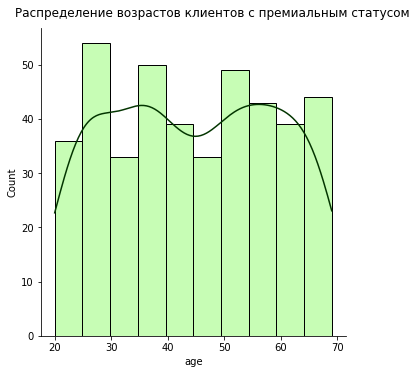

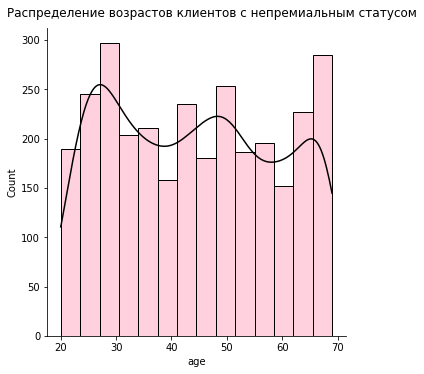

In [35]:
# построение графика распределения возрастов клиентов с премиальным статусом
sns.displot(data=premium_clients, x='age', kde=True, facecolor='xkcd:pale green', color='xkcd:dark green')
plt.suptitle('Распределение возрастов клиентов с премиальным статусом', x=0.6, y=1.03)

# построение графика распределения возрастов клиентов с непремиальным статусом
sns.displot(data=non_premium_clients, x='age', kde=True, facecolor='xkcd:light pink', color='black')
plt.suptitle('Распределение возрастов клиентов с непремиальным статусом', x=0.6, y=1.03)

In [36]:
# мода возрастов премиальных клиентов
premium_clients.age.mode()

0    25.0
dtype: float64

In [37]:
# мода возрастов непремиальных клиентов
non_premium_clients.age.mode()

0    28.0
dtype: float64

Text(0.5, 0.98, 'Совмещение графиков распределений возрастов премиальных и непремиальных клиентов')

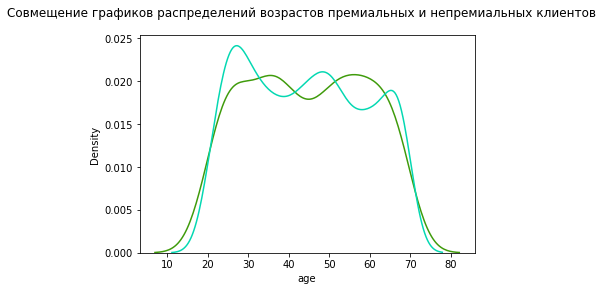

In [38]:
# сведение двух графиков распределений в один (для удобства сравнения данных и для наглядности)
sns.kdeplot(data=premium_clients, x='age', color='xkcd:grass green')
sns.kdeplot(data=non_premium_clients, x='age', color='xkcd:aquamarine')
plt.suptitle('Совмещение графиков распределений возрастов премиальных и непремиальных клиентов')

# Зелёная линия - премиальные клиенты, голубая - непремиальные

Выводы:
- минимальные, максимальные и средние значения возрастов премиальных и непремиальных клиентов одинаковы
- в целом, для премиальных и непремиальных клиентов характерно разное распределение возрастов
- мода возрастов клиентов с премиальным статусом - 25 лет, с непремиальным статусом - 28 лет
- в распределении возрастов премиальных клиентов наблюдается два максимума - около 40 лет и около 60
- в распределении возрастов непремиальных клиентов наблюдается один максимум - около 25 лет
- клиенты в возрасте 20-30, 40-55 и 65+ лет чаще имеют непремиальный статус
- клиенты в возрасте 30-40 и 55-65 чаще имеют премиальный статус

## В какой день недели клиенты совершают максимальное число операций?

In [39]:
# создание столбца day_of_the_week, содержащего порядковый номер дня недели 
clients_logs_df['day_of_the_week'] = clients_logs_df['date'].dt.weekday + 1

In [40]:
clients_logs_df

,client,premium,age,success,platform,time,date,day_of_the_week
0,46346,False,58.0,True,phone,1585452839,2020-03-29 03:33:59,7
1,4391,False,55.0,False,phone,1585409861,2020-03-28 15:37:41,6
2,27372,False,64.0,False,phone,1585446018,2020-03-29 01:40:18,7
3,11989,False,44.0,True,computer,1585403698,2020-03-28 13:54:58,6
4,60664,False,49.0,True,phone,1585406918,2020-03-28 14:48:38,6
...,...,...,...,...,...,...,...,...
4495,50,NaN,NaN,True,tablet,1585412688,2020-03-28 16:24:48,6
4496,68031,NaN,NaN,True,computer,1585464203,2020-03-29 06:43:23,7
4497,39878,NaN,NaN,False,phone,1585412838,2020-03-28 16:27:18,6
4498,73299,NaN,NaN,True,phone,1585458370,2020-03-29 05:06:10,7


In [41]:
# подсчет количества операций по дням недели,
# сортировка по убыванию этого значения, переименовывание колонки platform
clients_logs_df.groupby('day_of_the_week', as_index=False) \
    .agg({'platform':'count'}) \
    .sort_values(by='platform', ascending=False) \
    .rename(columns={'platform':'number_of_operations'})

,day_of_the_week,number_of_operations
1,7,2270
0,6,2230


Выводы:
- максимальное число успешных операций совершается клиентами в воскресенье

## В какой час суток максимальное число операций оказывается неудачным?

In [42]:
# создание столбца hour, содержащего час суток
clients_logs_df['hour'] = clients_logs_df['date'].dt.hour

In [43]:
clients_logs_df

,client,premium,age,success,platform,time,date,day_of_the_week,hour
0,46346,False,58.0,True,phone,1585452839,2020-03-29 03:33:59,7,3
1,4391,False,55.0,False,phone,1585409861,2020-03-28 15:37:41,6,15
2,27372,False,64.0,False,phone,1585446018,2020-03-29 01:40:18,7,1
3,11989,False,44.0,True,computer,1585403698,2020-03-28 13:54:58,6,13
4,60664,False,49.0,True,phone,1585406918,2020-03-28 14:48:38,6,14
...,...,...,...,...,...,...,...,...,...
4495,50,NaN,NaN,True,tablet,1585412688,2020-03-28 16:24:48,6,16
4496,68031,NaN,NaN,True,computer,1585464203,2020-03-29 06:43:23,7,6
4497,39878,NaN,NaN,False,phone,1585412838,2020-03-28 16:27:18,6,16
4498,73299,NaN,NaN,True,phone,1585458370,2020-03-29 05:06:10,7,5


In [44]:
# отбор только неудачных операций, подсчет их количества по времени суток, 
# сортировка по убыванию этого значения, переименование столбца platform
clients_logs_df.query('success == False') \
    .groupby('hour', as_index=False) \
    .agg({'platform':'count'}) \
    .sort_values(by='platform', ascending=False) \
    .rename(columns={'platform':'number_of_failed_operations'})

,hour,number_of_failed_operations
6,6,68
21,21,67
3,3,62
16,16,61
5,5,61
0,0,59
23,23,58
19,19,57
9,9,55
15,15,53


Выводы:
- максимальное количество операций оказывается неудачным в 6 утра

## Прослеживается ли годовая сезонность в числе совершаемых операций?

In [45]:
# создание столбца month, содержащего порядковый номер месяца совершения операции
clients_logs_df['month'] = clients_logs_df['date'].dt.month

In [46]:
# просмотр уникальных значений столбца month
clients_logs_df.month.unique()

array([3], dtype=int64)

Исходные логи содержат информацию только за один месяц года (март), поэтому никаких выводов о наличии или отсутствии годовой сезонности сделать нельзя

## 9. Клиенты какого возраста совершили наибольшее количество успешных операций (для каждого вида платформ)?

In [47]:
# просмотр всех возможных видов платформ
clients_logs_df.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [48]:
# создание DataFrame, содержащего только клиентов, совершивших успешные операции на телефоне
# DataFrame отсортирован по количеству клиентов, имеющих определенный возраст 
successful_phone = clients_logs_df.query('success == True & platform =="phone"') \
    .groupby('age', as_index=False) \
    .agg({'premium':'count'}) \
    .sort_values(by='premium', ascending=False) \
    .rename(columns={'premium':'successful_operations'})

In [49]:
successful_phone.head()

,age,successful_operations
8,28.0,67
48,68.0,64
32,52.0,57
45,65.0,55
5,25.0,55


In [50]:
# создание DataFrame, содержащего только клиентов, совершивших успешные операции на планшете
# DataFrame отсортирован по количеству клиентов, имеющих определенный возраст 
successful_tablet = clients_logs_df.query('success == True & platform =="tablet"') \
    .groupby('age', as_index=False) \
    .agg({'premium':'count'}) \
    .sort_values(by='premium', ascending=False) \
    .rename(columns={'premium':'successful_operations'})

In [51]:
successful_tablet.head(5)

,age,successful_operations
29,52.0,11
11,32.0,5
22,44.0,5
3,24.0,5
4,25.0,5


In [52]:
# создание DataFrame, содержащего только клиентов, совершивших успешные операции на компьютере
# DataFrame отсортирован по количеству клиентов, имеющих определенный возраст 
successful_computer = clients_logs_df.query('success == True & platform =="computer"') \
    .groupby('age', as_index=False) \
    .agg({'premium':'count'}) \
    .sort_values(by='premium', ascending=False) \
    .rename(columns={'premium':'successful_operations'})

In [53]:
successful_computer.head(5)

,age,successful_operations
8,28.0,49
29,49.0,33
5,25.0,33
12,32.0,27
48,68.0,26


Выводы:
- клиенты 28 лет совершили максимальное число успешных операций на телефоне и компьютере
- клиенты 52 лет совершили максимальное число успешных операций на планшете
- телефон - самая популярная платформа среди клиентов, планшет - наименее популярная
- возраст клиентов заметно варьирует среди количества успешных операций на всех платформах